# 🧠 Entendimiento del problema de negocio

## ✅ Pasos generales en un problema de clasificación

1. **Entendimiento del problema** (selección de la métrica más adecuada)  
2. **Obtención de datos y primer contacto**  
3. **División en Train y Test**  
4. **MiniEDA**: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. **Preparación del dataset de Train**: Conversión de categóricas, tratamiento de numéricas  
6. **Selección e instanciación de modelos**. Baseline.  
7. **Comparación de modelos** (por validación cruzada o tras optimización de hiperparámetros)  
8. **Selección de modelo final**: Optimización de hiperparámetros  
9. **Equilibrado del train set**  
10. **Evaluación contra test**  
11. **Análisis de errores y acciones futuras**  
12. **Persistencia del modelo en disco**

---

## 🧩 Guía práctica: ¿Qué métrica usar según el problema?

### 1. Clasificación binaria

| Negocio te dice... | Qué es importante | Métrica principal | Métricas complementarias |
|--------------------|-------------------|-------------------|---------------------------|
| "Evita tratar a quien no lo necesita" | Minimizar FP | **Precision** | F1, matriz de confusión |
| "No podemos dejar sin tratar a un enfermo" | Minimizar FN | **Recall** | F1, curva PR |
| "Queremos equilibrio entre FP y FN" | Balance | **F1-score** | ROC-AUC, curva PR |
| "Queremos minimizar costes" | Costes específicos | **Custom loss** | Coste por predicción |

> ⚠️ **Evitar accuracy si hay desbalance**

---

### 2. Clasificación multiclase

| Escenario | Métricas clave |
|----------|----------------|
| Clases equilibradas | Accuracy, macro F1 |
| Clases desbalanceadas | Recall por clase, weighted F1 |
| Coste desigual por clase | Métricas ponderadas (confusión por clase) |

---

### 3. Regresión

| Negocio te dice... | Qué medir | Métrica recomendada | Alternativas |
|--------------------|-----------|----------------------|--------------|
| "Que no se equivoque mucho de media" | Error medio | **MAE** | MSE |
| "Castiga más los errores grandes" | Errores extremos | **RMSE** | MAE |
| "Nos importa el porcentaje de error" | Escala relativa | **MAPE** | MAE, RMSE |
| "Queremos saber si mejora la media" | Explicación global | **R²** | RMSE, MAE |

---

### 4. Agrupamiento (Clustering)

| Tipo de validación | Métrica recomendada |
|--------------------|---------------------|
| Interna (sin etiquetas reales) | Silhouette Score, Davies-Bouldin |
| Externa (con etiquetas reales) | ARI, NMI, Homogeneity |

---

### 5. Series temporales

| Requisito de negocio | Métrica recomendada |
|----------------------|---------------------|
| Error absoluto | MAE |
| Penalizar errores altos | RMSE |
| Comparación relativa | sMAPE, MASE |
| Evaluación visual | Gráfico real vs predicción |

---

## 📌 Esquema rápido de decisión

```markdown
# ¿Qué tipo de problema tengo?
- Binario → Precision / Recall / F1
- Multiclase → Accuracy / macro F1
- Regresión → MAE, RMSE, MAPE
- Clustering → Silhouette, ARI
- Series temporales → MAE, RMSE, sMAPE

# ¿Qué me pide negocio?
- ¿Evitar errores graves? → Precision / Recall
- ¿Evitar errores grandes? → RMSE
- ¿Medir error medio? → MAE
- ¿Medir % de error? → MAPE
- ¿Explicabilidad? → R²

# ¿Qué hago para comparar?
- Métrica principal + matriz de confusión o gráfico
- Validación cruzada si hay pocos datos


# SPRINT 12: ML: MODELOS SUPERVISADOS III. OTROS MODELOS Y REPASO

## K-NEAREST NEIGHBOURS (KNN) - Clasificación y Regresión

KNN es un algoritmo de aprendizaje supervisado basado en la proximidad entre vectores. No requiere entrenamiento tradicional: simplemente almacena los datos y compara distancias al hacer predicciones.

🧠 Fundamento
- Clasificación: Asigna una clase en base a la moda (mayoría) de los vecinos más cercanos.

- Regresión: Predice un valor promedio de los vecinos más cercanos.

🔁 Pasos para aplicar KNN (clasificación o regresión)

In [ ]:
# 1. Cargar y preparar datos

import pandas as pd
from sklearn.model_selection import train_test_split

# 2. Escalar variables (muy importante en KNN)
# KNN es muy sensible a la escala, así que es necesario normalizar 
# o estandarizar.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Importar e instanciar el modelo

from sklearn.neighbors import KNeighborsClassifier  # o KNeighborsRegressor
knn = KNeighborsClassifier(n_neighbors=K)  # elegir K según análisis

# 4. Entrenar el modelo (aunque KNN "entrena" simplemente almacenando dataset)

knn.fit(X_train, y_train)

# 5. Realizar predicciones

y_pred = knn.predict(X_test)

# 6. Evaluar el modelo
# Clasificación: accuracy, matriz de confusión, F1...

from sklearn.metrics import accuracy_score, confusion_matrix

# Regresión: MAE, RMSE, R2

from sklearn.metrics import mean_squared_error

⚙️ Selección del valor óptimo de K
- No hay un método exacto. Lo más habitual es probar varios valores (ej: de 1 a 20) y elegir el que maximice el rendimiento.

- Valores pequeños → muy sensibles al ruido.

- Valores grandes → modelos más estables pero menos precisos en clases minoritarias.

Ejemplo de búsqueda de K óptimo:

In [ ]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"K={k} → Accuracy: {knn.score(X_test, y_test)}")

📎 Notas clave
- KNN es lento con muchos datos, porque calcula distancias con todos los puntos.

- Puede usarse tanto para problemas de clasificación como de regresión.

- Requiere preprocesamiento cuidadoso (escalado de datos).

## 📌 Regresión Polinómica (Polynomial Regression)

Cuando la relación entre variables no es lineal, una regresión lineal no es suficiente. La regresión polinómica permite capturar relaciones no lineales mediante la transformación de las variables originales en nuevas variables elevadas a potencias.

🧠 Fundamento
Consiste en ampliar el espacio de variables incluyendo:

Potencias de las features originales: 
𝑥
,
𝑥
2
,
𝑥
3
,
…
x,x 
2
 ,x 
3
 ,…

Combinaciones entre variables (si hay más de una feature)

Aunque el modelo sigue siendo lineal en los coeficientes, el comportamiento se vuelve no lineal respecto a las variables.

🔁 Pasos para aplicar regresión polinómica

In [ ]:
# 1. Preparar los datos
from sklearn.model_selection import train_test_split
X = df[["feature"]].values
y = df["target"].values

# 2. Transformar las variables con PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=d)  # d es el grado del polinomio
X_poly = poly.fit_transform(X)

# 3. Entrenar el modelo de regresión lineal

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

# 4. Predecir nuevos valores
#Recordar: hay que transformar las features antes de predecir

X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

⚠️ Sobreajuste (Overfitting)
Grados altos capturan muy bien el patrón del entrenamiento, pero generalizan mal.

Es recomendable:

- Usar validación cruzada para elegir el grado.

- Visualizar el error en training vs test.

- No pasar de grado 3-4 sin justificación sólida.

## 📌 Support Vector Machine (SVM)

SVM es un modelo supervisado de clasificación (también puede usarse en regresión). Su objetivo es encontrar el hiperplano que mejor separa las clases maximizando el margen entre los puntos de distintas clases.

🧠 Fundamento
- Busca el separador lineal con mayor margen entre las clases.

- Los puntos más cercanos al hiperplano se llaman vectores de soporte, y determinan el modelo.

- Si los datos no son separables linealmente, se recurre a kernels para transformar el espacio.

🔁 Pasos para aplicar un modelo SVM (clasificación)

In [ ]:
# 1. Preparar los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 2. Escalado obligatorio
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Instanciar y entrenar el modelo
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)  # 'linear', 'poly', 'rbf'
model.fit(X_train, y_train)

# 4. Predecir y evaluar
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

🔀 Parámetros importantes
- kernel: tipo de transformación (ver más abajo).

- C: penalización por errores (cuanto mayor, menos margen permite → modelo más estricto).

- gamma: en kernels RBF, controla cuánto influye un solo punto (bajo = amplio, alto = localizado).

🧪 Kernels: separación no lineal

Cuando los datos no son linealmente separables, se usan kernels que transforman el espacio:
| Kernel   | Descripción                              |
| -------- | ---------------------------------------- |
| `linear` | Hiperplano lineal                        |
| `poly`   | Polinómico (grado definido con `degree`) |
| `rbf`    | Radial (transforma a dimensión infinita) |


In [ ]:
SVC(kernel='poly', degree=3)
SVC(kernel='rbf', gamma=0.1)

## 📉 SVM en regresión (SVR)

También puede usarse para regresión, con SVR:

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

⚠️ Consideraciones clave
- Muy sensible al escalado de los datos. Siempre escalar antes.

- Sensibilidad a outliers: puede alterar el margen y los vectores de soporte.

- No es recomendable para datasets grandes, ya que el entrenamiento puede ser costoso.

- Hiperparámetro C controla el trade-off entre margen amplio y clasificación perfecta.

✅ Guía paso a paso para un modelo supervisado con KNN


In [ ]:
# 1. Carga de datos
df = pd.read_csv("ruta_al_csv", sep=";")
df.head()
df.info()

# 2. Análisis del target
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores=True, relativa=True)

#🔹 Si está desbalanceado, apúntalo. Esto afectará al rendimiento de modelos 
# y puede requerir:
# Usar métricas robustas (recall, balanced accuracy)
# Hacer balanceo (SMOTE, undersampling...) en casos graves

# 3. Limpieza de columnas no útiles (irrelevantes o con muchos nulos)
df.drop("columna_con_nulos", axis=1, inplace=True)

# 4. División Train/Test
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# 5. Análisis de variables numéricas
features_num = ["var1", "var2"]
train_set[features_num].describe()
train_set[features_num].hist()

#🔸 Revisa:
# Rango entre variables → escalado necesario para KNN
# Distribución sesgada → aplica log si hay mucha asimetría

# 6. Análisis de variables categóricas
features_cat = ["col_categorica"]
bt.pinta_distribucion_categoricas(train_set, features_cat, mostrar_valores=True, relativa=True)

#✔️ Si es binaria, puedes codificarla como 0 y 1
#✔️ Si tiene más de dos categorías, necesitarás one-hot encoding (para otros modelos)

#7. Preprocesamiento de features

# Categórica → binaria
train_set["col"] = train_set["col"].apply(lambda x: 1 if x == "positive" else 0)
test_set["col"] = test_set["col"].apply(lambda x: 1 if x == "positive" else 0)

# Numéricas → escalado
scaler = MinMaxScaler()
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

# 8. Separar X e y y entrenar KNN
X_train = train_set[features_cat + features_num]
y_train = train_set[target]
X_test = test_set[features_cat + features_num]
y_test = test_set[target]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 9. Evaluación inicial
print(classification_report(y_train, knn.predict(X_train)))
print(classification_report(y_test, knn.predict(X_test)))

# 10. Optimizar K manualmente
metricas = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()
    metricas.append(score)

best_k = np.argmax(metricas) + 1

#✔️ Usa balanced_accuracy si el dataset está desbalanceado
#✔️ Entrena y evalúa el modelo final con el mejor k

# 11. Búsqueda de hiperparámetros con GridSearch
param_grid = {
    "n_neighbors": range(1, 20),
    "weights": ["uniform", "distance"]
}

grid = GridSearchCV(knn, param_grid, cv=5, scoring="balanced_accuracy")
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

# ✔️ weights="distance" puede mejorar si hay ruido o vecinos poco representativos




## ⚖️ Equilibrado de Clases (Class Imbalance)
📌 ¿Qué es un dataset desbalanceado?
Un dataset está desbalanceado cuando las clases del target no están representadas de forma proporcional, es decir, una clase aparece con mucha más frecuencia que otra.
Ejemplo típico: 90% clase 'no', 10% clase 'yes'.

❗¿Por qué es un problema?
Los modelos pueden aprender a predecir siempre la clase mayoritaria y tener una alta accuracy pero bajo recall o F1-score para la clase minoritaria.

💡 Consejo inicial:
Antes de aplicar técnicas, entiende bien el objetivo de negocio:

- ¿Interesa maximizar el recall de la clase minoritaria?

- ¿O reducir los falsos positivos?

- ¿Qué cuesta y qué se gana con un TP, FP, FN, TN?

### 🧪 Estrategias para abordar el desequilibrio

✅ 0. No hacer nada (modelo base)
Evaluar sin modificar el dataset:

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Métricas clave:

- Precisión / recall de la clase minoritaria

- Matriz de confusión: ConfusionMatrixDisplay.from_predictions(...)

🔁 1. Over-sampling (sobremuestreo)

🧬 SMOTE (Synthetic Minority Over-sampling Technique)

Crea nuevas observaciones sintéticas de la clase minoritaria usando KNN.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Pros: mejora el recall sin perder datos
Contras: riesgo de overfitting si se abusa

📦 Otras alternativas de oversampling:

- RandomOverSampler() (repite observaciones)

- ADASYN() (parecido a SMOTE, pero adaptativo)

🔻 2. Under-sampling (bajomuestreo)
Reduce el número de observaciones de la clase mayoritaria.

In [ ]:
from sklearn.utils import resample

may = X_train[y_train == "no"]
min_ = X_train[y_train == "yes"]

may_down = resample(may, replace=False, n_samples=len(min_), random_state=42)

X_train_bal = pd.concat([may_down, min_])
y_train_bal = pd.concat([y_train.loc[may_down.index], y_train.loc[min_.index]])

Pros: rápido y simple
Contras: pierde datos valiosos → riesgo de subentrenamiento

⚖️ 3. Ajuste de pesos (class_weight)

Aplica un peso mayor a la clase minoritaria en la función de pérdida del modelo. Recomendado si no quieres tocar el dataset.

In [ ]:
model = LogisticRegression(class_weight='balanced')

✔️ Muchos modelos de sklearn lo soportan (DecisionTree, SVM, RandomForest, etc.)

📊 Comparativa de resultados
| Técnica            | Precisión (YES) | Recall (YES) | Comentario                                         |
| ------------------ | --------------- | ------------ | -------------------------------------------------- |
| **Sin equilibrar** | 0.64            | 0.36         | Alta precisión clase NO, muy bajo recall clase YES |
| **SMOTE**          | 0.51            | 0.61         | Mejora de recall, algo de precisión                |
| **Under-sampling** | 0.39            | 0.85         | Mucho recall, baja precisión (dispara a todo)      |
| **class\_weight**  | 0.39            | 0.85         | Similar a under-sampling, pero sin eliminar datos  |

### 🧠 Consejos finales para el equilibrio de clases

⚠️ No hay una solución universal → prueba varias y evalúa

📉 Siempre evalúa con métricas por clase: precisión, recall, F1

📊 Usa validación cruzada para testear robustez

🎯 Ajusta el umbral de decisión (predict_proba) si no quieres reequilibrar el dataset

-------------

# 🧠 Análisis de Errores

Analizar los errores es esencial para mejorar un modelo y adaptarlo a las prioridades reales del negocio. No basta con obtener un buen accuracy global: es necesario entender qué está fallando, cómo y por qué.

## ⚠️ Importancia del Análisis de Errores
- Identifica clases con bajo rendimiento (recall, precisión...).

- Detecta patrones sistemáticos de error.

- Prioriza mejoras según el impacto del fallo (no todas las clases pesan igual).

- Te guía hacia una mejor interpretación del modelo y ajustes más efectivos.

## 🔍 Análisis de errores en Clasificación
✅ Proceso paso a paso



In [ ]:
# 1. Entrena un modelo de clasificación

# 2. Evalúa con métricas por clase

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

# 3. Inspecciona la matriz de confusión normalizada (recall por fila)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')

## 🧭 Cómo interpretar la matriz
- Lectura por filas (con normalize="true"):
Cada fila representa una clase real → el valor muestra a qué clase fue clasificada.

- Las diagonales altas indican buen recall.

- Las desviaciones fuera de la diagonal indican confusiones sistemáticas.

💡 Ejemplo de análisis cualitativo

- Si clase 2 se clasifica mal y casi siempre como clase 4 o 5 → hay un sesgo ascendente.

- Si una clase con poco soporte tiene bajo recall, puedes:

    -Reentrenar un modelo específico para esa clase.

    - Balancear las clases (oversampling).

    - Aplicar un modelo de segundo nivel ("modelo cascada").


## 📈 Sugerencias para mejorar tras el análisis
1. Ingeniería de variables
Nuevas variables o transformar las existentes (escalado, codificación ordinal...).

2. Modelos especializados
Para clases con errores sistemáticos o de alto impacto → crear modelos dedicados.

3. Reentrenar con class_weight
Penalizar más los errores en las clases minoritarias.

4. Evaluar impacto real
Discutir con negocio: ¿cuál es el coste real de predecir mal cada clase?

## 📉 Análisis de Errores en Regresión
Cuando trabajamos con modelos de regresión, no podemos usar una matriz de confusión como en clasificación, pero sí podemos analizar los errores individuales (residuos), su distribución y su relación con las predicciones. Esto nos ayuda a identificar sesgos o zonas problemáticas.

⚙️ Preparación del problema de regresión

Se cambia el target a una variable numérica continua. En el ejemplo con el dataset diamonds:

In [ ]:
target_regresion = "price"
features_cat_reg = ["color", "clarity", "cut"]
features_num_reg = [...]  # numéricas sin incluir "price"

Se aplica StandardScaler a las numéricas y luego se invierte el escalado del target para que vuelva a su escala real:

In [ ]:
train_set["price"] = scaler.inverse_transform(train_set[features_num])[..., price_idx]

### 🧪 Métricas de evaluación en regresión
| Métrica                                  | Interpretación                                                        |
| ---------------------------------------- | --------------------------------------------------------------------- |
| `MAE` (Error absoluto medio)             | Cuánto se equivoca el modelo de media (sin penalizar grandes errores) |
| `MAPE` (Error porcentual medio)          | Cuánto se equivoca el modelo en proporción al valor real              |
| `RMSE` (Raíz del error cuadrático medio) | Penaliza más los errores grandes                                      |


### 📊 Visualizaciones esenciales
1. Gráfico de reales vs predichos

Permite detectar si el modelo funciona peor en ciertos rangos del target (por ejemplo, en precios altos):

In [ ]:
plot_predictions_vs_actual(y_real, y_pred)

Idealmente, los puntos deben estar alineados con la línea roja y = x.

2. Distribución de residuos

Ayuda a ver si los errores tienen una distribución simétrica o sesgada:

In [ ]:
residuos = y_test - y_pred
sns.histplot(residuos, kde=True)

Una distribución normal de residuos suele indicar un modelo razonablemente ajustado.

3. Residuos vs Predicciones

Permite identificar zonas del rango de predicción donde el modelo sesga (por ejemplo, subestimando sistemáticamente):

In [ ]:
plt.scatter(y_pred, residuos)

Un buen modelo debería mostrar los residuos dispersos alrededor del 0 sin patrones claros.

### 🧠 ¿Qué hacer con la información del análisis?

En el ejemplo de diamonds, se observa que:

El modelo funciona mejor en precios bajos.

Para precios > 7500, hay mayor error y dispersión.

El modelo parece sesgar más en la "cola larga" de la distribución.

Esto puede indicar que:

El modelo necesita mayor capacidad para manejar precios altos.

Puede ser útil hacer un modelo específico para ese segmento.

Otra opción es binnear el target y convertirlo en clasificación.

### 💡 Sugerencias de mejora

1. Ingeniería de características

Transformar o crear nuevas features que ayuden al modelo.

2. Modelos alternativos

RandomForest, GradientBoosting, XGBoost...

3. Ajuste de hiperparámetros

Profundidad, número de árboles, learning rate...

4. Tratamiento de outliers

Revisar los valores extremos que distorsionan la predicción.

5. Segmentación del modelo

Crear un modelo exclusivo para valores altos o usar ensemble de modelos.

# SPRINT 13: ML: MODELOS NO SUPERVISADOS I. CLUSTERING

## Clustering no supervisado

Datos no etiquetados. Tenemos la **X**, las características de entrada, pero no tenemos la de salida **y** (el *target*). No podemos supervisar ni aplicar los algoritmos que hemos visto.

El **aprendizaje no supervisado** es un método de *aprendizaje automático* donde el modelo se ajusta a las observaciones. Se distingue del supervisado porque **no hay conocimiento a priori**: los datos no están etiquetados (no tienen *target*).

El aprendizaje supervisado lo hemos aplicado a construir **cajas que permiten predecir o asignar una etiqueta**, que es precisamente lo que falta en los datasets no supervisados. Según esa etiqueta, hablamos de problemas de **clasificación** y de **regresión**.

### Campos de aplicación del aprendizaje no supervisado

Tiene dos grandes campos de aplicación:

1. **Análisis cluster**  
   Algoritmos cuyo objetivo es **crear grupos de instancias similares** no definidos por nosotros a priori.  
   Gran herramienta para:
   - Análisis de datos
   - Segmentación de clientes
   - Sistemas de recomendación
   - Motores de búsqueda
   - Segmentación de imágenes
   - Aprendizaje semisupervisado

2. **Reducción de dimensionalidad**  
   Cuando tenemos miles de posibles *features*, surgen dos problemas:
   - Modelado más lento, tanto en la construcción como en la predicción.
   - A medida que metemos más *features*, aunque parezca que ayudamos al modelo, podemos dificultar que el algoritmo encuentre soluciones óptimas (**maldición de la dimensionalidad**).

   Una forma de aliviarlo es aplicar algoritmos que **transforman las *features* de entrada en un número sensiblemente menor de *features***, combinando las anteriores, y que pueden tener igual o mayor poder predictivo, o mejorar los tiempos.



# 1. Clustering

## ¿Qué es el clustering?

El **clustering** agrupa datos **no etiquetados** en diferentes grupos (**clusters**) de forma automática.  
El objetivo es que las instancias dentro de un mismo grupo sean lo más similares posible, y las de diferentes grupos lo más diferentes posible.

Los algoritmos de clustering suelen utilizar como criterio la **distancia entre los puntos** en el espacio de características, considerando las *features* como componentes de un vector.

### Clasificación vs Clustering

- En **clasificación** tenemos los datos **etiquetados** y utilizamos algoritmos supervisados (Regresión Logística, SVC, Decision Tree...) para entrenar y predecir las clases.
- En **clustering** no tenemos etiquetas. Es el propio algoritmo el que **crea los grupos** (k clusters) en base a similitudes. El modelo no sabe cuál es cada clase, solo agrupa observaciones similares.

---

## Aplicaciones del clustering

- **Segmentación de clientes**  
  Clasificación de clientes en grupos para sistemas recomendadores. No se definen los segmentos previamente; se dejan que el algoritmo agrupe y luego se decide cómo actuar sobre cada grupo.

- **Data Analysis**  
  Muy útil para descubrir agrupaciones naturales en un dataset.  
  También se puede usar para **crear nuevas *features*** en problemas supervisados, por ejemplo generando clusters automáticos (por ejemplo con latitud y longitud) e incluyendo la clase del cluster como una nueva variable.

- **Reducción de la dimensionalidad**  
  Después de aplicar clustering, se puede representar cada observación por su afinidad con los clusters, sustituyendo múltiples *features* por una nueva variable que indica el cluster al que pertenece.

- **Detección de anomalías**  
  Observaciones con **baja afinidad** respecto a su grupo pueden ser consideradas **anomalías** o *outliers*.  
  Ejemplo: detección de comportamientos inusuales de usuarios.

- **Algoritmos de búsqueda**  
  Búsqueda de imágenes o elementos similares a una referencia, funcionando como un sistema de recomendación basado en clusters.

---

## Tipos de algoritmos de clustering

### 1️⃣ Clustering no jerárquico

Los grupos generados no tienen relación jerárquica entre sí.  
El algoritmo optimiza una función de "distancia" a partir de unos **prototipos** (seleccionados aleatoriamente o manualmente).  
El algoritmo parte de estos prototipos e iterativamente mejora el clustering.

- **K-Means**  
  Algoritmo basado en distancias. La suma de las distancias de los puntos al centroide de su cluster debe ser mínima.

- **DBSCAN**  
  Define los clusters como regiones de **alta densidad** de observaciones, permitiendo detectar clusters de forma más flexible y robusta a *outliers*.

### 2️⃣ Clustering jerárquico

Los clusters guardan una **relación jerárquica** entre sí.  
Se establece una distancia entre las propias clases, lo que permite construir un **dendrograma** que representa la estructura jerárquica.  
Según el punto de corte que pongamos en el dendrograma, obtendremos más o menos clusters.

- **Agrupación aglomerativa (Bottom-Up)**  
  Cada instancia empieza como un cluster individual, y se van agrupando las más cercanas.

- **Agrupación divisiva (Top-Down)**  
  Se parte de un **supercluster** que contiene todas las instancias, y se va dividiendo progresivamente en clusters más pequeños.

---

✅ **Resumen:**  
El clustering es una herramienta muy potente del aprendizaje no supervisado, con aplicaciones en análisis exploratorio, sistemas de recomendación, reducción de dimensionalidad y detección de anomalías.



# 2. Reducción de dimensionalidad

## ¿Qué es la reducción de dimensionalidad?

Consiste en **reducir el número de *features*** en un dataset, tratando de conservar la información relevante para el modelo.  
Después de reducir la dimensionalidad, se compara si el nuevo dataset permite obtener modelos con igual o mejor rendimiento.

Cada instancia en un dataset se representa como un **vector de n dimensiones** (n = número de *features*).  
A medida que añadimos más *features*, aumentamos la **dimensionalidad** del dataset.

### Efecto de la dimensionalidad

- El número de muestras necesarias para estimar una función con un cierto nivel de precisión crece **exponencialmente** con el número de dimensiones → *maldición de la dimensionalidad*.
- A más dimensiones:
  - Mejoran los tiempos de ejecución.
  - Los datos se dispersan más en el espacio → las distancias entre puntos aumentan.
  - Inicialmente, esto puede mejorar la clasificación o la capacidad de diferenciación.
  - Sin embargo, si las nuevas dimensiones no aportan información útil, aumenta el riesgo de **overfitting** → nuevas observaciones quedan muy alejadas, produciendo predicciones poco fiables.
  - **Solución parcial:** incrementar el tamaño del conjunto de entrenamiento.

---

## Técnicas de reducción de dimensionalidad

### En modelos supervisados (con *target*)

Ya vimos técnicas de **selección de *features***:

- **Feature Selection:**  
  Selección basada en la correlación entre las *features* y el *target*.  
  Ejemplo: `feature_importances_`.

- **Wrapper:**  
  Ejemplo: `sklearn.feature_selection.RFE` (*Recursive Feature Elimination*).  
  Va añadiendo o eliminando *features* iterativamente, evaluando el impacto en el rendimiento del modelo.

- **Intrinsic (embedded):**  
  Ejemplo: `sklearn.feature_selection.SelectFromModel`.  
  Selecciona *features* a partir de la importancia que asigna un modelo previo.

### En modelos no supervisados (sin *target*)

- **PCA (Análisis de Componentes Principales):**  
  Técnica de reducción de dimensionalidad que genera nuevas *features* (componentes principales) que explican la mayor parte de la varianza del dataset.

- **Variance Threshold:**  
  Elimina *features* con **varianza baja**, es decir, que aportan poca información.

---

## Aplicaciones de la reducción de dimensionalidad

- **Mejora computacional**  
  Modelos más rápidos de entrenar y predecir.

- **Detección de *features* discriminantes**  
  Identificación de las variables que más valor aportan al modelo.

- **Eliminación de *features* irrelevantes**  
  Mejora la interpretabilidad del modelo.

- **Compresión de la información**  
  Por ejemplo, en el procesamiento de imágenes.

- **Visualización de datos**  
  Ejemplo: reducción a 2 o 3 dimensiones mediante **PCA** para facilitar la exploración visual.

---

✅ **Resumen:**  
Reducir la dimensionalidad permite **simplificar el modelo**, mejorar tiempos de ejecución y combatir la *maldición de la dimensionalidad*, siempre procurando no perder la información clave del problema.



### Introducción – Clasificación _vs_ Agrupamiento (Agrupamiento)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

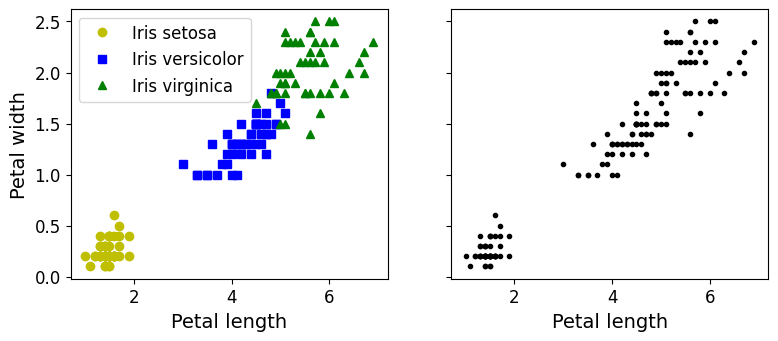

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)


plt.show();

El dataset representado a la izquierda es el que usaríamos con un modelo supervisado para hacer la clasificación. El dataset representado a la derecha es, en cambio, el que tendríamos si no tuvieramos etiquetas y el que entregaríamos a un algoritmo no supervisado como kmeans. Es lo que vamos a hacer en la siguiente celda (ojo es solo a título ilustrativo)

In [ ]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=101)

y_pred = kmeans.fit_predict(X)

# Los 0s del kmeans en realidad son los 1s del dataset y viceversa (ajuste para comparar)
mapping = np.array([1, 0, 2])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

Pintemos la salida y comparémosla al caso supervisado:

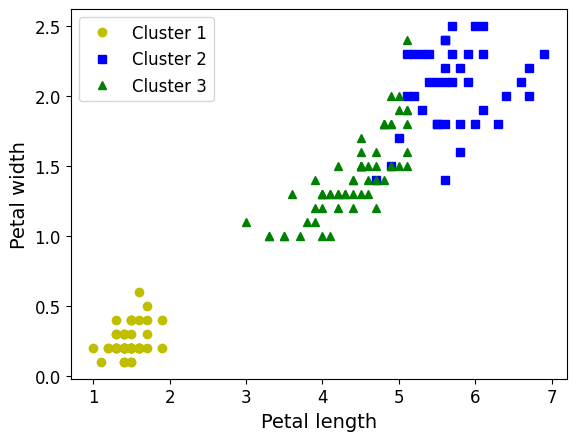

In [ ]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

No lo ha hecho nada mal. Pero ojo, antes de que se te haga un lío el cerebro, fijate en las etiquetas de la leyenda. El algoritmo ha encontrado una agrupación con esos nombres, no puede decir si corresponden a un tipo u otro de flor, sólo lo hacemos nosotros porque tenemos la versión "supervisada". En un realidad en la que no la tuvieramos sólo tendríamos esa clasificación (la de la imagen) y no su explicación. A partir de ahí trabajaríamos.

### K-Means

## ✨ Introducción

El algoritmo **K-means** es un algoritmo de *clustering* sencillo, rápido y eficiente, capaz de agrupar datos en **k clusters** en pocas iteraciones.

- Propuesto por **Stuart Lloyd** en Bell Labs en 1957, publicado en 1982.
- Publicado de forma independiente por **Edward W. Forgy** en 1965 → a veces llamado *algoritmo Lloyd-Forgy*.

👉 **K** es un **hiperparámetro** que indica el número de clusters que queremos generar. Tendremos que buscar una forma de optimizar este valor (lo veremos más adelante).

---

## 🌀 ¿Qué es un Centroide?

El **centroide** es el **centro de un cluster**. 

- Es el punto que representa el centroide de los "manchurrones" de datos que queremos crear.
- Se calcula como el **promedio de cada feature** de los puntos que pertenecen al cluster.

### 📐 Definición formal

En geometría, el centroide o baricentro de un conjunto de puntos $(x_i, y_i, z_i)$ se calcula como:

$$
C_x = \frac{1}{n}\sum_{i=1}^{n} x_i, \quad 
C_y = \frac{1}{n}\sum_{i=1}^{n} y_i, \quad 
C_z = \frac{1}{n}\sum_{i=1}^{n} z_i
$$

En Machine Learning:

- Un **centroide** es el punto que representa el centro de un cluster.
- Se recalcula en cada iteración de K-means a partir del promedio de todas las observaciones que pertenecen a ese cluster.

---

## 🚀 Funcionamiento básico de K-means

1. Elegimos el número de clusters **K**.
2. Inicializamos aleatoriamente **K centroides**.
3. Repetimos hasta converger:
    - Asignamos cada punto de datos al centroide más cercano (formando clusters).
    - Recalculamos los centroides como el promedio de los puntos de cada cluster.

👉 El algoritmo termina cuando los centroides no cambian o cambian muy poco.

---

## ⚙️ Código base para aplicar K-means en Python

```python
# Importamos las librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ejemplo: vamos a suponer que tenemos un DataFrame llamado df con las columnas numéricas a clusterizar
# Supongamos que queremos hacer clustering sobre las columnas 'feature1' y 'feature2'

X = df[['feature1', 'feature2']]  # seleccionamos las columnas numéricas

# Definimos el modelo con K clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustamos el modelo
kmeans.fit(X)

# Obtenemos las predicciones (a qué cluster pertenece cada punto)
df['cluster'] = kmeans.labels_

# Obtenemos las coordenadas de los centroides
centroids = kmeans.cluster_centers_

# Visualizamos los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster', palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroides')
plt.legend()
plt.title('Clusters obtenidos con K-means')
plt.show()


---

## 🗺️ Límites de decisión y diagrama de Voronoi

Una de las formas más interesantes de visualizar los resultados de un K-means es trazar los **límites de decisión** entre los clusters.

👉 Esta visualización se llama **diagrama de Voronoi**: nos muestra qué regiones del espacio de datos corresponden a cada cluster.

---

### 🚦 Concepto clave

- Los **límites de decisión** indican las zonas del espacio que se asignan a cada centroide.
- Cada punto del espacio se asigna al **centroide más cercano** → esta es la lógica que sigue el K-means.

---

### ✏️ Código: funciones auxiliares

Estas funciones NO son fundamentales para el aprendizaje del algoritmo, pero sí muy útiles para visualizar los resultados.

```python
# Función para dibujar los puntos de datos
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# Función para dibujar los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

# Función para trazar los límites de decisión (diagrama de Voronoi)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # Definimos el grid de puntos
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # Predecimos a qué cluster pertenece cada punto del grid
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujamos las regiones
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    # Dibujamos los puntos de datos
    plot_data(X)

    # Dibujamos los centroides (opcional)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # Etiquetas de los ejes
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


# Hard Clustering vs. Soft Clustering

En el contexto del clustering, existen dos enfoques principales para asignar instancias a clústeres:

## Hard Clustering

- Consiste en asignar cada instancia **al clúster más cercano**.
- Es un enfoque **determinista**: cada instancia pertenece a un único clúster.
- Es lo que hace el método `kmeans.predict()`, que devuelve la etiqueta del clúster más cercano para cada instancia.

```python
# Ejemplo de Hard Clustering
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)
# Resultado: array([2, 2, 1, 1], dtype=int32)
```

🔹 Este comportamiento es análogo al hard voting en los ensamblados (ensembles).

## Soft Clustering

- En lugar de asignar una única etiqueta, se calcula la distancia a cada centroide.
- Esto permite tener una idea de la cercanía relativa a todos los clústeres.
- El método kmeans.transform() devuelve precisamente esta información.

```python
# Ejemplo de Soft Clustering
kmeans.transform(X_new)
# Resultado:
array([[2.88468831, 2.90886155, 0.35083255, 1.51889559, 2.80754989],
       [5.84017149, 5.85069849, 2.812728  , 4.49697731, 5.80394207],
       [1.71505482, 0.28210043, 3.28038973, 1.6619582 , 1.21436711],
       [1.219972  , 0.36868613, 3.20902516, 1.5253504 , 0.72581567]])
```

- Estas distancias se pueden usar como features adicionales en un modelo.

- También es una buena forma de reducir dimensionalidad: se pasa de n variables originales a k distancias.

🔹 Este comportamiento es análogo al soft voting en los ensamblados (ensembles).

Verificación: Cálculo manual de distancias

Puedes comprobar que kmeans.transform() realmente devuelve las distancias euclidianas entre las instancias y los centroides:

```python
np.linalg.norm(
    np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, 
    axis=2
)
```

# Resultado (mismo que transform()):

```python
array([[2.88468831, 2.90886155, 0.35083255, 1.51889559, 2.80754989],
       [5.84017149, 5.85069849, 2.812728  , 4.49697731, 5.80394207],
       [1.71505482, 0.28210043, 3.28038973, 1.6619582 , 1.21436711],
       [1.219972  , 0.36868613, 3.20902516, 1.5253504 , 0.72581567]])
```

Explicación:
- np.tile() y reshape permiten repetir X_new tantas veces como centroides haya (k).

- Se calcula la norma euclidiana entre cada punto y cada centroide.

- El resultado es una matriz de shape (n_instancias, k).

| Tipo de Clustering | Salida Principal            | Uso                                             |
| ------------------ | --------------------------- | ----------------------------------------------- |
| Hard Clustering    | Clúster asignado (etiqueta) | Clasificación pura                              |
| Soft Clustering    | Distancias a los centroides | Reducción de dimensionalidad, análisis avanzado |



# Algoritmo K-Means

## Funcionamiento teórico

El algoritmo K-Means es uno de los algoritmos de agrupamiento más rápidos y simples.

Pasos básicos:

1. **Inicialización**:  
   Se eligen aleatoriamente $k$ instancias del dataset como centroides iniciales.

2. **Asignación**:  
   Se asigna cada instancia al clúster cuyo centroide esté más cercano.

3. **Actualización**:  
   Se recalculan los centroides como la media de las instancias asignadas a cada clúster.

4. **Repetición**:  
   Se repiten los pasos 2 y 3 hasta que los centroides converjan (dejen de moverse más allá de una tolerancia) o se alcance el número máximo de iteraciones.

### Notas:

- La clase `KMeans` de `sklearn` implementa una versión optimizada.  
- Para forzar el comportamiento "original" con inicialización aleatoria: `init="random"` y `n_init=1`.

---

## Ejemplo: Evolución de los centroides

Vamos a ejecutar K-Means con `max_iter=1`, `2`, y `3`, para visualizar cómo evolucionan los centroides:

```python
# Inicialización
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=24)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2, random_state=24)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=24)

# Entrenamiento
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
```

## Hiperparámetros relevantes

```python
init      # Método de inicialización de los centroides. 'random' los elige aleatoriamente.
n_init    # Número de veces que se repite el algoritmo con diferentes inicializaciones.
max_iter  # Número máximo de iteraciones para recalcular centroides.
```

## Visualización

```python
plt.figure(figsize=(10, 8))

# Iteración 1: centroides iniciales y zonas de decisión
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_)
plt.title("Iteración 1 - Centroides iniciales")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X)
plt.title("Iteración 1 - Etiquetado de instancias")

# Iteración 2
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X)

# Iteración 3
plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X)

plt.show()
```

## Variabilidad de K-Means
Como los centroides iniciales son aleatorios, K-Means puede converger a soluciones distintas en diferentes ejecuciones

```python
# Definimos función para comparar dos clusterers
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X)
    if title2:
        plt.title(title2)
```

## Ejemplo con dos inicializaciones distintas:
```python
kmeans_rnd_init1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=141)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solución 1 (rs=42)", "Solución 2 (rs=141)")
plt.show()
```
¿Cuál es la mejor solución?

La mejor se suele escoger en base a la inercia (inertia), que mide qué tan compactos son los clústeres.

Por defecto, KMeans repite el proceso (n_init) varias veces y devuelve la solución con menor inercia.




# Inercia (Inertia)

Cuando usamos K-Means, necesitamos una forma de evaluar la calidad del clustering.

👉 Como el clustering es un problema **no supervisado**, no tenemos métricas como *precisión* o *recall*.  
Sin embargo, sí podemos medir la **distancia entre cada instancia y su centroide asignado**.

Esto es la idea detrás de la métrica de **_inercia_** (*inertia* en inglés).

---

## Definición de Inercia

> **Inercia = suma de las distancias al cuadrado de cada punto a su centroide más cercano.**

- Cuanto **menor** es la inercia, más compactos son los clústeres → agrupación "mejor".
- No garantiza clusters "óptimos", pero es una métrica de referencia.

```python
# Obtener la inercia directamente
kmeans_rnd_init1.inertia_
# Resultado: 266.6059795469669

kmeans_rnd_init2.inertia_
# Resultado: 625.7421301887271
```
### Interpretación
En este ejemplo, el primer modelo tiene menor inercia → mejor agrupación.

## Verificación manual
La inercia es realmente la suma de las distancias al cuadrado, y podemos comprobarlo:

```python
# Distancias de cada instancia a cada centroide
X_dist = kmeans_rnd_init1.transform(X)

# Suma de las distancias al cuadrado a su centroide asignado
sum(X_dist[np.arange(len(X_dist)), kmeans_rnd_init1.labels_]**2)

# Resultado: 266.6059795469672
```

## Calculo alternativo (manual)

```python
inercia = 0
for indice, vector in enumerate(X):
    clase_asignada = kmeans_rnd_init2.labels_[indice]
    distancia = np.linalg.norm(vector - kmeans_rnd_init2.cluster_centers_[clase_asignada])
    inercia += distancia**2

print(inercia)
# Resultado: 625.7421301887265
```

## Inercia y score()
- La clase KMeans también ofrece el método score(), que devuelve la inercia negativa.

- ¿Por qué negativa? → porque por convención en sklearn, el método score() siempre debe ser "cuanto más grande, mejor".

```python
# Score (inercia negativa)
kmeans_rnd_init1.score(X)
# Resultado: -266.60597954696686
```
## Utilidad de la Inercia
- Nos permite comparar distintas ejecuciones de K-Means con diferentes inicializaciones.

- Nos ayuda a mitigar la dependencia de la inicialización aleatoria.

- Se usa en técnicas como el método del codo (elbow method) para elegir el número óptimo de clústeres.

👉 Objetivo: minimizar la inercia.


# Múltiples Inicializaciones en K-Means

## Problema de Variabilidad

K-Means puede converger a soluciones diferentes en función de la inicialización aleatoria de los centroides.

👉 Esto puede llevar a resultados subóptimos, con clústeres mal formados.

Ejemplo:

```python
kmeans_rnd_init1.inertia_  # 266.61
kmeans_rnd_init2.inertia_  # 625.74
kmeans.inertia_            # 218.53  → mejor solución
```
## Solución: Múltiples Inicializaciones
Para mitigar este problema, es recomendable ejecutar el algoritmo varias veces con diferentes inicializaciones y quedarse con la mejor solución (la de menor inercia).

Esto se controla con el hiperparámetro:
```python
n_init  # Número de veces que se repite el algoritmo con distintas inicializaciones.
```

Por defecto en sklearn, n_init=10.

Ejemplo:
```python
kmeans_rnd_10_init = KMeans(n_clusters=5, init='random', n_init=10, random_state=29)
kmeans_rnd_10_init.fit(X)
```

👉 El algoritmo ejecuta 10 inicializaciones → selecciona la que minimiza la inercia.

## Visualización de la solución
```python
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_init, X)
plt.show()
```

## Importancia de la Inercia
- Internamente, la inercia permite que KMeans seleccione la mejor ejecución tras múltiples inicializaciones.

-  Además, la inercia es útil para encontrar el número de clústeres óptimo (k), mediante el conocido: Método del Codo (Elbow Method) → se explica en la siguiente sección.

# Encontrar el número óptimo de clústeres

## Método basado en la inercia

Como la inercia mide la compacidad del clustering, parece razonable intentar encontrar el número de clústeres $k$ que minimice la inercia.

Sin embargo:

- **A más clústeres, menor inercia** → pero no siempre más clústeres significan mejor agrupación.
- Si simplemente minimizamos la inercia, acabaríamos con tantos clústeres como instancias.

👉 Por eso se utiliza el **Método del Codo** (*Elbow Method*).

---

## Ejemplo visual

Probamos diferentes valores de $k$ y observamos:

```python
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

# Inercias
kmeans_k3.inertia_  # 645.15
kmeans_k8.inertia_  # 136.63
```

👉 La inercia disminuye con $k$, pero no siempre el modelo resultante es bueno.

## Método del Codo (Elbow Method)
En lugar de elegir simplemente el $k$ con menor inercia, graficamos inercia vs. número de clústeres y buscamos el "codo" de la curva:

```python
# Entrenamos modelos con diferentes k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=25).fit(X)
                for k in range(1, 10)]

# Recogemos las inercias
inertias = [model.inertia_ for model in kmeans_per_k]

# Graficamos
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow/Codo',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()
```
Interpretación:
- A partir de cierto $k$, la mejora en la inercia se vuelve marginal.

- Ese "codo" es el punto de compromiso: buen clustering sin sobreajustar.

👉 En el ejemplo, el codo aparece en $k=4$.

## Visualización de la solución con $k=4$
```python
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()
```

Observación:
- $k=4$ ofrece un buen equilibrio.

- Más clústeres no mejorarían significativamente el agrupamiento, y menos clústeres serían claramente insuficientes.

# Encontrar el número óptimo de clústeres

## Mediante las siluetas

### Coeficiente de Silueta

El **coeficiente de silueta** mide, para cada instancia, qué tan bien está agrupada:

$$(b - a) / \max(a, b)$$

Donde:

- $a$ = distancia media a las instancias del mismo clúster (intra-clúster).
- $b$ = distancia media al clúster más cercano (inter-clúster).

Interpretación:

| Valor del coeficiente | Interpretación |
|-----------------------|----------------|
| Cerca de **+1**       | Instancia bien agrupada |
| Cerca de **0**        | Instancia cerca del borde entre clústeres |
| Cerca de **-1**       | Instancia probablemente mal asignada |

👉 En la práctica, se usa el **silhouette_score**: el promedio de los coeficientes de todas las instancias.

### Cálculo del Silhouette Score

```python
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)
# Ejemplo: 0.6495
```

## Silhouette Score para varios k
Probamos distintos valores de $k$ y graficamos:

```python
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()
```
👉 Esta visualización permite ver qué valores de $k$ dan un mejor clustering.

En el ejemplo:

- $k=4$ y $k=5$ son buenas elecciones → valores de silueta altos y estables.
- $k$ muy bajo o muy alto deteriora la calidad.

## Diagrama de Silueta (Silhouette Diagram)
Visualiza el coeficiente de silueta de cada instancia, ordenadas por clúster y valor de coeficiente:
```python
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.show()
```

Interpretación:

- Cada "cuchillo" es un clúster → su grosor indica el número de muestras.
- El coeficiente debería ser alto y consistente dentro de cada clúster.
- Instancias con coeficiente negativo → probablemente mal asignadas.

👉 En el ejemplo, $k=4$ y $k=5$ son buenas opciones.

## Límites de K-Means
K-Means asume:

- Clústeres convexos y aproximadamente esféricos.

- Distribución homogénea.

Cuando esta suposición no se cumple → K-Means puede fallar.

Ejemplo con clústeres de forma irregular:

```python
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)
```

Comparación:

```python
# Modelo con centroides bien elegidos manualmente
kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1,
                     random_state=42)

# Modelo con inicialización aleatoria
kmeans_bad = KMeans(n_clusters=3, random_state=19)

kmeans_good.fit(X)
kmeans_bad.fit(X)

# Visualización
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()
```
Observaciones:

- La inercia puede ser más baja aunque el clustering sea peor si la forma de los datos no se adapta bien a las suposiciones de K-Means.
- En este ejemplo, la visualización de fronteras de decisión es clave.


# Clustering No Jerárquico (II): DBSCAN

## Introducción

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en la densidad, es decir, agrupa puntos que están muy juntos entre sí y detecta zonas de baja densidad como *ruido* o *outliers*.

### Ventajas principales:

✅ No requiere definir el número de clusters.  
✅ Puede encontrar clusters de cualquier forma (no necesita que sean esféricos como k-means).  
✅ Identifica fácilmente outliers o anomalías.

### Limitaciones:

⚠️ La elección de `eps` y `min_samples` es muy importante.  
⚠️ No funciona bien si la densidad varía mucho entre clusters.

---

## Cómo funciona DBSCAN

DBSCAN define los grupos como **regiones continuas de alta densidad**. Su funcionamiento paso a paso es el siguiente:

1. Para cada punto, cuenta cuántos puntos están dentro de una distancia `eps` (ε-neighborhood).
2. Si un punto tiene al menos `min_samples` en su vecindario (incluyéndose a sí mismo), es una **instancia core** (core instance).
3. Todas las instancias dentro del vecindario de una instancia core pertenecen al mismo cluster. Los vecindarios se van fusionando a medida que se conectan entre sí.
4. Los puntos que no son core y no están en el vecindario de ninguna core se consideran **anomalías** (etiquetadas como `-1`).

### Parámetros clave

- `eps`: distancia máxima para considerar que un punto es vecino de otro.
- `min_samples`: número mínimo de puntos para formar un cluster.

---

## Ejemplo práctico

### 1️⃣ Configuración inicial

```python
# Common imports
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Estabilidad
np.random.seed(42)

# Plot bonito
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignorar warnings inútiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
```

### Interpretación de los resultados
Con eps pequeño, se identifican muchos clusters y también anomalías.

Al aumentar eps, los vecindarios crecen y los clusters se consolidan en formas más amplias. Se pueden conseguir agrupaciones más limpias y con menos anomalías.

## "Predicciones" con DBSCAN

### Limitación del método `.predict()`

Una curiosidad de DBSCAN es que **no tiene un método `.predict()`**.  
Sí que tiene un método `.fit_predict()`, que permite etiquetar el conjunto de datos con el que fue entrenado (train), pero **no permite directamente predecir la etiqueta de nuevas instancias que no estaban en el entrenamiento**.

👉 Esto tiene sentido porque DBSCAN es un algoritmo basado en la densidad de los datos observados inicialmente. Si se añaden nuevos puntos, habría que "reanálisis" la densidad, cosa que el modelo no hace por diseño.

---

### Solución práctica: combinar DBSCAN con un clasificador supervisado

Lo que sí podemos hacer es **usar las etiquetas que nos ha dado DBSCAN como si fueran etiquetas de clasificación**.

Por tanto:

- Después de entrenar el DBSCAN, tenemos nuestro dataset etiquetado.
- Ahora podemos usar ese dataset etiquetado para entrenar cualquier algoritmo de clasificación (KNN, RandomForest, SVM, etc).
- De este modo sí podremos **clasificar nuevas instancias** que lleguen en el futuro.

### Elección del conjunto de entrenamiento

Cuando entrenamos el clasificador, podemos elegir qué datos usar:

- **Solo las instancias core** (core instances): más fiables, están en zonas de alta densidad.
- **Todas las instancias excepto anomalías** (puntos con etiqueta != -1).
- **Todas las instancias** (incluso las que DBSCAN consideró anomalías). No suele ser recomendable.

### Entrenamiento típico

Es muy habitual **usar solo las instancias core** como datos de entrenamiento del clasificador:

- Las instancias core son las que realmente "definen" los clusters.
- Los puntos frontera o ruido no son tan fiables.

---

### Proceso de predicción de nuevas instancias

El clasificador supervisado (por ejemplo KNN) que hemos entrenado sí tiene `.predict()` y `.predict_proba()`, así que:

- Le pasamos las nuevas instancias.
- El clasificador devuelve la predicción de a qué cluster pertenece cada una.

---

### Refinamiento: detección de anomalías en las nuevas predicciones

Una limitación de este enfoque es que **el clasificador va a predecir sí o sí una clase para todos los puntos**.  
Sin embargo, hay situaciones en las que querríamos que ciertos puntos se considerasen **anomalías**, como hace el propio DBSCAN.

¿Cómo podemos hacerlo?

1. Al usar KNN (o cualquier clasificador basado en distancias), podemos obtener no solo la clase predicha, sino también **la distancia al vecino más cercano**.
2. Podemos establecer un umbral (por ejemplo, la `eps` que habíamos usado en DBSCAN) para decidir:
    - Si la distancia al vecino más cercano es **menor que el umbral**, aceptamos la predicción.
    - Si la distancia es **mayor que el umbral**, consideramos el punto como anomalía (`-1`).

Este criterio nos permite **imitar el comportamiento de DBSCAN**, incluso cuando estamos prediciendo con un clasificador supervisado.

---

### Resumen final

- DBSCAN **no tiene `.predict()`** porque el algoritmo no se diseñó para nuevas predicciones fuera del conjunto de entrenamiento.
- Para resolverlo, **entrenamos un clasificador supervisado** con los datos etiquetados por DBSCAN.
- Es recomendable usar **solo las instancias core** como datos de entrenamiento.
- Podemos usar la distancia al vecino más cercano para establecer un criterio de **detección de anomalías** en nuevas predicciones.
- DBSCAN es un algoritmo **potente y simple**, ideal para detectar clusters de cualquier forma y detectar outliers.
- Limitación: si la densidad varía mucho entre clusters, o si el número de instancias es muy grande, DBSCAN puede no ser la mejor opción.

---

### Ventajas e inconvenientes de DBSCAN

| Ventajas | Inconvenientes |
|----------|----------------|
| No requiere especificar nº de clusters. | No permite `.predict()` directamente. |
| Detecta clusters de cualquier forma. | Sensible a `eps` y `min_samples`. |
| Detecta outliers automáticamente. | Dificultad si la densidad de los clusters varía mucho. |
| Robusto a ruido. | Computación no lineal con nº de instancias (lento con datasets grandes). |

---


# Clustering Jerárquico: Aproximación "aglomerativa" o bottom-up

## Problema de negocio y motivación

El *Clustering Jerárquico* es una técnica de agrupamiento que permite identificar patrones de similitud entre elementos de un conjunto de datos. Se usa cuando queremos explorar la estructura de los datos y generar grupos sin necesidad de especificar a priori el número de grupos.

**Ejemplo de aplicación**: segmentación de clientes en marketing, donde queremos identificar perfiles de cliente similares para adaptar campañas, promociones, etc.

### Ventajas
- Muy interpretable y visual.
- Funciona bien con datasets pequeños.
- No requiere predefinir el número de clusters (como K-Means).

### Limitaciones
- Escalabilidad (no adecuado para datasets muy grandes).
- Los resultados no son directamente evaluables (problema no supervisado → no hay etiquetas).

---

## Proceso general

### 1. Obtención y exploración de los datos

Aunque no se hace split de train/test en clustering jerárquico (no hay target), sí se realiza un **mini EDA** con estos objetivos:

- Verificar la necesidad de escalar o transformar variables numéricas.
- Codificar correctamente las variables categóricas.
- Explorar visualmente si ya existen agrupaciones claras que puedan orientar la selección de features.

### 2. Variables numéricas

- Revisar escalas y distribuciones.
- Evaluar necesidad de aplicar transformaciones (logaritmo, raíz cuadrada, etc.).
- Tener en cuenta que los algoritmos de clustering jerárquico se basan en distancias → el escalado importa.

### 3. Variables categóricas

- Codificar adecuadamente (por ejemplo, binarización).
- Revisar si es necesario escalar las numéricas para mantener la coherencia con las categóricas codificadas.
- En caso de binaria (0/1), se puede plantear multiplicar por una constante para ajustar la escala.

### 4. Selección de features

- Aunque se pueden usar todas las features, conviene evaluar combinaciones de 2 o 3 para visualizar potenciales clusters.
- Esta selección mejora la interpretabilidad y facilita comunicar resultados a stakeholders (por ejemplo, equipo de marketing).

---

## Visualización: Dendrograma

El **dendrograma** es la herramienta visual fundamental del clustering jerárquico.

- Representa de forma gráfica cómo se agrupan los elementos.
- Permite decidir a posteriori cuántos clusters utilizar (corte visual a cierta altura del dendrograma).

### Claves para interpretar un dendrograma

- El eje Y representa la distancia entre clusters en el espacio de las features seleccionadas.
- Cortar el dendrograma a una altura concreta equivale a fijar un número de clusters.
- Los métodos de linkage determinan cómo se calcula la "distancia" entre clusters.

---

## Comprendiendo el Clustering Jerárquico

### Tipos de Clustering Jerárquico

- **Divisivo (top-down)**: parte de un único cluster y va dividiéndolo.
- **Aglomerativo (bottom-up)**: parte de cada punto como su propio cluster y va fusionándolos. Es el enfoque más habitual.

### Algoritmo de Clustering Jerárquico Aglomerativo (AHC)

1. Se trata cada punto de datos como un cluster individual → K clusters iniciales.
2. Se unen los dos clusters más cercanos → K-1 clusters.
3. Se repite el proceso hasta obtener un único cluster.
4. El dendrograma refleja todo el proceso.

### Importancia de la distancia entre clusters

Se deben definir dos cosas:
- **Métrica de distancia** (por ejemplo, `euclidean`).
- **Método de linkage** (definición de "distancia entre clusters"):

| Método de linkage | Descripción |
|-------------------|-------------|
| single            | Distancia mínima entre puntos de dos clusters |
| complete          | Distancia máxima entre puntos de dos clusters |
| average           | Promedio de distancias entre puntos de dos clusters |
| ward              | Minimiza la varianza total dentro de los clusters (muy usado, asume distancia euclídea) |

---

## Funciones importantes

### Dendrograma

```python
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def plot_dendrogram(data, method='ward', metric='euclidean', figsize=(10,7)):
    """
    Traza un dendrograma para visualizar la estructura jerárquica de los clusters.

    Args:
        data (pd.DataFrame): Datos que se usarán para el clustering.
        method (str): Método de linkage ('single', 'complete', 'average', 'ward').
        metric (str): Métrica de distancia ('euclidean', 'manhattan', etc.).
        figsize (tuple): Tamaño de la figura.

    Returns:
        None. Muestra el dendrograma.
    """
    plt.figure(figsize=figsize)
    plt.title("Dendrograma")
    clusters = shc.linkage(data, method=method, metric=metric)
    shc.dendrogram(Z=clusters)
    plt.show()


## Métodos de vinculación (Linkage Methods)

Hay muchos métodos de enlace. Al entender cómo funcionan, podrás elegir el apropiado para tus necesidades. Cada uno dará diferentes resultados cuando se aplique. No hay una regla fija en el análisis de agrupamiento: es recomendable **estudiar la naturaleza del problema**, probar diferentes métodos e inspeccionar los resultados.

### Principales métodos de linkage

#### Vínculo simple (Single Linkage)

- También conocido como **vecino más cercano** (*Nearest Neighbor*).
- La distancia entre los clústeres se define como la distancia entre sus miembros más cercanos.

**Ventajas**:
- Tiende a alargar los clusters → forma "cadenas".

**Inconvenientes**:
- Sensible al *ruido* y a outliers.

#### Enlace completo (Complete Linkage)

- También conocido como **vecino más lejano** (*Furthest Neighbor*), *Voor Hees algorithm*.
- La distancia entre los clústeres se define como la distancia entre sus miembros más lejanos.

**Ventajas**:
- Genera clusters compactos y esféricos.

**Inconvenientes**:
- Más costoso computacionalmente.
- Menos robusto si los clusters tienen formas irregulares.

#### Enlace promedio (Average Linkage)

- También conocido como **UPGMA** (*Unweighted Pair Group Method with Arithmetic Mean*).
- Se calcula el promedio de distancias entre todos los pares de puntos posibles entre dos clusters.

**Ventajas**:
- Solución intermedia entre Single y Complete linkage.
- Produce resultados razonablemente equilibrados.

#### Enlace del centroide (Centroid Linkage)

- También conocido como **UPGMC** (*Unweighted Pair Group Method using Centroids*).
- Se calcula el centroide de cada cluster (media de los puntos) y la distancia entre clusters se mide entre sus centroides.

**Ventajas**:
- Conceptualmente simple.
- Tiende a funcionar bien en clusters con forma convexa.

**Inconvenientes**:
- Puede causar el fenómeno de **inversión** en el dendrograma (problema de inconsistencias).

#### Enlace de Ward (Ward Linkage)

- También conocido como **MISSQ** (*Minimal Increase of Sum-of-Squares*).
- La distancia entre dos clusters se basa en el aumento del **Error de la Suma de Cuadrados (ESS)** que se produciría si se fusionan.
- Busca minimizar el aumento de ESS en cada paso.

**Ventajas**:
- Tiende a producir clusters muy homogéneos.
- Muy usado por defecto en la práctica.
- Robusto.

**Inconvenientes**:
- Requiere utilizar una métrica de distancia adecuada, típicamente **euclidiana**.

---

## Opciones de distancia

Además del método de linkage, es necesario elegir una **métrica de distancia**. Algunas de las más habituales:

| Métrica       | Descripción |
|---------------|-------------|
| Euclidiana    | Distancia geométrica "recta" entre puntos. Muy usada con Ward. |
| Manhattan     | Suma de distancias absolutas (como moverse en un grid). |
| Minkowski     | Generalización de Euclidiana y Manhattan. |
| Chebyshev     | Máxima diferencia en cualquiera de las dimensiones. |
| Coseno        | Basada en el coseno del ángulo entre dos vectores (usada en texto). |
| Jaccard       | Mide la similitud entre conjuntos (común en datos categóricos). |

---

## Recomendación práctica

- **Método más común** → `Ward` con `Euclidiana`:
  - Ward minimiza el error cuadrático.
  - Euclidiana es adecuada para espacios de baja dimensión.

- Es la combinación que hemos utilizado para el dendrograma del ejemplo.

- En este caso concreto:
  - 2 características (`Annual Income` y `Spending Score`).
  - 200 observaciones.
  - → Espacio de baja dimensión (200 > 2), lo que hace que Euclidiana sea muy adecuada.

---

## Selección de K a partir del dendrograma

Ya hemos discutido métricas, enlaces y cómo cada uno puede impactar en nuestros resultados. Ahora continuamos con el análisis del dendrograma para obtener una indicación del número de clústeres.

### Método del mayor salto (gap)

El dendrograma no nos da directamente un "K óptimo". Sin embargo, podemos usar el **método del mayor salto (gap)**:

- Consiste en buscar el espacio horizontal más grande (el mayor gap) sin líneas verticales.
- Dicho de otra forma: identificar la distancia más larga entre clusters antes de que se unan.
- Se traza una línea horizontal a través de esa distancia.

**Procedimiento**:
- Trazar una línea horizontal en el dendrograma.
- Contar cuántas veces cruza líneas verticales → número de clusters sugerido.

### Interpretación

- Si al trazar una línea a altura `y=300` cruza 3 líneas → sugerencia de 3 clusters.
- Si otra línea a `y=240` cruza 5 líneas → sugerencia de 5 clusters.
- La decisión final se complementa con el análisis de visualización de los datos (por ejemplo, scatter plot).

**Nota**: el dendrograma es solo una **referencia**. Los resultados dependen del método de linkage y de la métrica utilizada. Se recomienda:

- Probar diferentes combinaciones de enlace y métrica.
- Comparar los resultados visualmente.
- Utilizar el dendrograma como apoyo, no como única decisión.

---

## Implementando un Clustering Jerárquico Aglomerativo

Una vez decidimos el número de clusters `K`, podemos aplicar el algoritmo con Scikit-Learn:

### Ejemplo de implementación

```python
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
```
### Visualización del resultado
```python
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, 
                hue=data_labels, palette="rainbow").set_title('Labeled Customer Data')
```

### Interpretación del resultado
Ejemplo de interpretación de clusters obtenidos:

- Cluster 0: clientes con salarios altos pero bajos gastos → clientes cautelosos.

- Cluster 2: clientes con salarios altos y altos gastos → clientes ideales para targeting.

- Cluster 1: clientes con ingresos y gastos promedio → gran volumen, interesante para campañas.

- Cluster 4: clientes con salarios bajos y bajos gastos → susceptibles a promociones.

- Cluster 3: clientes con bajos ingresos pero altos gastos → posiblemente a evitar.

## Ventajas del agrupamiento jerárquico

### Cuándo usarlo

- Cuando queremos **entender relaciones de similitud** entre observaciones.
- Cuando nos interesa poder responder a preguntas como:
    - "*¿Qué observaciones son más parecidas a esta en concreto?*".
- Cuando necesitamos una técnica:
    - Poco sensible a condiciones de inicialización.
    - Flexible para datos mixtos (numéricos + categóricos).
    - Robusta frente a outliers.
    - Capaz de captar relaciones jerárquicas.

### Resumen de ventajas

- **Nivel de detalle**:
    - Proporciona información granular sobre qué observaciones son más similares entre sí.
    - No solo asigna una etiqueta de cluster, sino que permite explorar toda la jerarquía.
- **Estabilidad**:
    - No depende de condiciones de inicialización (semillas aleatorias u orden del dataset).
- **Adaptabilidad**:
    - Puede adaptarse fácilmente para manejar datos mixtos (numéricos + categóricos) utilizando métricas de distancia adecuadas.
- **Familiaridad**:
    - Después de K-Means, es uno de los métodos más conocidos y estudiados, lo que facilita su aceptación en entornos de negocio.
- **Robustez frente a outliers**:
    - Los outliers no afectan gravemente al proceso de clustering jerárquico aglomerativo.
    - Tienden a unirse al final del proceso, cuando el resto de los datos ya están agrupados.
- **Flexibilidad en la forma de los clusters**:
    - No hace suposiciones estrictas sobre la forma de los clusters.
    - Dependiendo de la métrica de distancia y linkage utilizada, puede detectar clusters de formas variadas.

---

## Desventajas del agrupamiento jerárquico

- **Escalabilidad limitada**:
    - Es relativamente lento para datasets grandes.
    - Requiere calcular la distancia entre **todas las observaciones**.
    - La complejidad es aproximadamente O(n²), por lo que no es adecuado para grandes volúmenes de datos.
- **Sensibilidad a la métrica y método de linkage**:
    - Los resultados pueden variar significativamente dependiendo de la combinación elegida.
    - Requiere experimentación y validación para garantizar resultados útiles.
- **No optimiza una función global**:
    - A diferencia de K-Means, no optimiza explícitamente un objetivo claro (por ejemplo, minimizar la suma de cuadrados intra-cluster).
    - La calidad de los clusters es más dependiente del criterio de linkage que se utilice.
- **No permite "deshacer" decisiones previas**:
    - En el proceso aglomerativo, una vez que dos clusters se han fusionado, esa decisión no se puede revertir.
    - Esto puede llevar a agrupaciones subóptimas si las primeras fusiones no fueron ideales.

---
